# **Lab11 - Hierarchical Agglomerative Clustering**

## Task 1: Load and Explore Data; 
- We will use the Iris datasetfrom scikit-learn.

In [3]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data          # features
y = iris.target        # true labels
feature_names = iris.feature_names

# Convert to DataFrame (optional, for inspection)
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Task 2: Data Preprocessing

- Standardize the data before clustering since the algorithm is distance-based.

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Task 3: Create Dendrogram: 
- Use scipy to visualize how data points merge at each step.

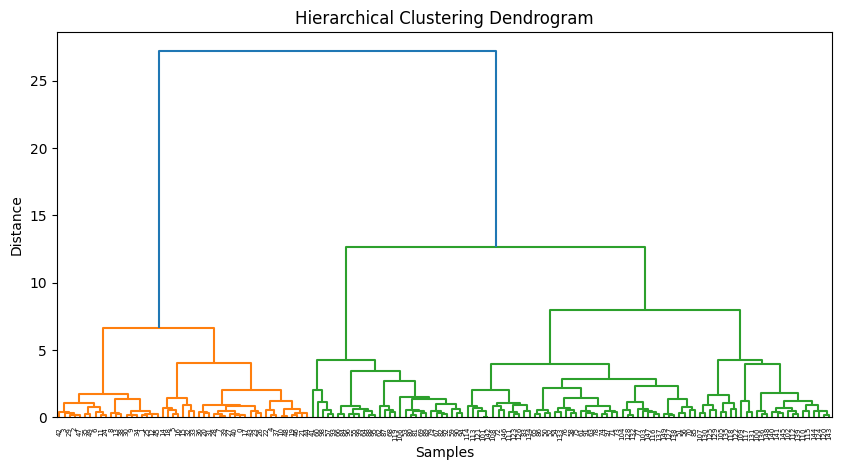

In [5]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Linkage matrix (Ward minimizes variance within clusters)
Z = linkage(X_scaled, method='ward')

plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

## Task 4: Apply Agglomerative Clustering:
- Perform clustering using Agglomerative Clustering from scikit-learn.

In [6]:
from sklearn.cluster import AgglomerativeClustering

# We know Iris has 3 classes (for evaluation comparison)
cluster_model = AgglomerativeClustering(
    n_clusters=3,
    linkage='ward'
)

cluster_labels = cluster_model.fit_predict(X_scaled)
print("Cluster labels:", cluster_labels)

Cluster labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 2 1 1 1 1 1 1 1 1 0 0 0 2 0 2 0 2 0 2 2 0 2 0 2 0 2 2 2 2 0 0 0 0
 0 0 0 0 0 2 2 2 2 0 2 0 0 2 2 2 2 0 2 2 2 2 2 0 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


## Task 5: Visualize Clusters:
- Visualize the clusters using the first two features for simplicity.

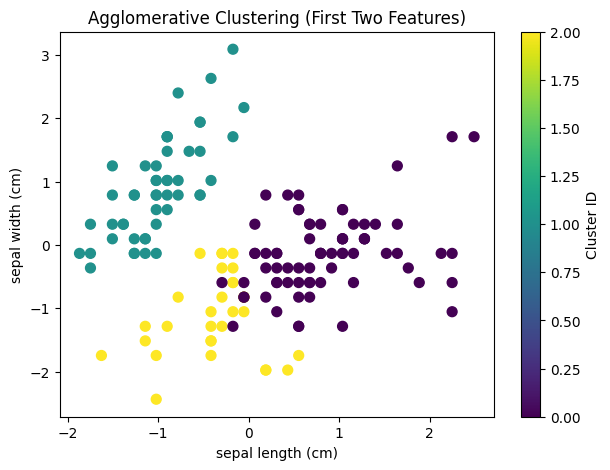

In [7]:
plt.figure(figsize=(7, 5))

scatter = plt.scatter(
    X_scaled[:, 0], 
    X_scaled[:, 1], 
    c=cluster_labels,
    cmap='viridis',
    s=50
)

plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title("Agglomerative Clustering (First Two Features)")
plt.colorbar(scatter, label="Cluster ID")
plt.show()

## Task 6: Evaluation 
- Check clustering performance using the Adjusted Rand Index (ARI).A higher ARI indicates better agreement between predicted clusters and true labels.

In [8]:
from sklearn.metrics import adjusted_rand_score

ari = adjusted_rand_score(y, cluster_labels)
print("Adjusted Rand Index (ARI):", ari)

Adjusted Rand Index (ARI): 0.6153229932145449


Interpretation

- ARI = 1.0 → Perfect clustering

- ARI ≈ 0 → Random labeling

- ARI < 0 → Worse than random